## Lab 9 - Genetic Algorithm

Genetic algorithms are defined as a type of computational optimization technique inspired by the principles of natural selection and genetics.
They are used to solve complex problems by mimicking the process of evolution to improve a population of potential solutions iteratively.

Before understanding the Genetic algorithm, let's first understand basic terminologies to better understand this algorithm:

<b>Population:</b> Population is the subset of all possible or probable solutions, which can solve the given problem.
    
<b>Chromosomes:</b> A chromosome is one of the solutions in the population for the given problem, and the collection of gene generate a chromosome.

<b>Gene:</b> A chromosome is divided into a different gene, or it is an element of the chromosome.
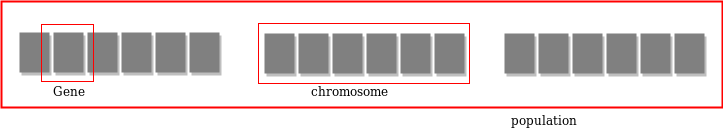


<b>Fitness Function:</b> The fitness function is used to determine the individual's fitness level in the population. It means the ability of an individual to compete with other individuals. In every iteration, individuals are evaluated based on their fitness function.

<b>Genetic Operators:</b> In a genetic algorithm, the best individual mate to regenerate offspring better than parents. Here genetic operators play a role in changing the genetic composition of the next generation.

<b>Selection:</b>After calculating the fitness of every existent in the population, a selection process is used to determine which of the individualities in the population will get to reproduce and produce the seed that will form the coming generation.

# How Genetic Algorithm Works?
The genetic algorithm works on the evolutionary generational cycle to generate high-quality solutions. These algorithms use different operations that either enhance or replace the population to give an improved fit solution.

It basically involves <b>five phases</b> to solve the complex optimization problems, which are given as below:

<ol>
  <li>Initialization</li>
  <li>Fitness Assignment</li>
  <li>Selection</li>
  <li>Reproduction</li>
  <li>Termination</li>
</ol>

### 1. Initialization
The process of a genetic algorithm starts by generating the set of individuals, which is called population. Here each individual is the solution for the given problem. An individual contains or is characterized by a set of parameters called Genes. Genes are combined into a string and generate chromosomes, which is the solution to the problem. One of the most popular techniques for initialization is the use of random binary strings.
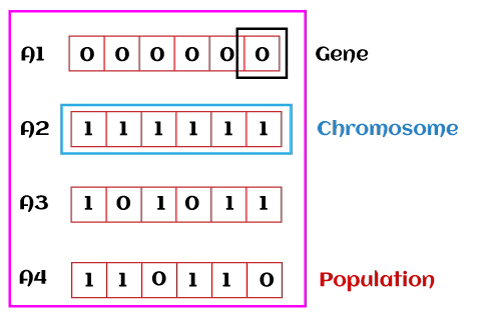

### 2. Fitness Assignment
Fitness function is used to determine how fit an individual is? It means the ability of an individual to compete with other individuals. In every iteration, individuals are evaluated based on their fitness function. The fitness function provides a fitness score to each individual. This score further determines the probability of being selected for reproduction. The high the fitness score, the more chances of getting selected for reproduction.

### 3. Selection
The selection phase involves the selection of individuals for the reproduction of offspring. All the selected individuals are then arranged in a pair of two to increase reproduction. Then these individuals transfer their genes to the next generation.

There are three types of Selection methods available, which are:

Roulette wheel selection
Tournament selection
Rank-based selection


### 4. Reproduction
After the selection process, the creation of a child occurs in the reproduction step. In this step, the genetic algorithm uses two variation operators that are applied to the parent population. The two operators involved in the reproduction phase are given below:
<ul>
   
<li> <b>Crossover:</b> The crossover plays a most significant role in the reproduction phase of the genetic algorithm. In this process, a crossover point is selected at random within the genes. Then the crossover operator swaps genetic information of two parents from the current generation to produce a new individual representing the offspring.

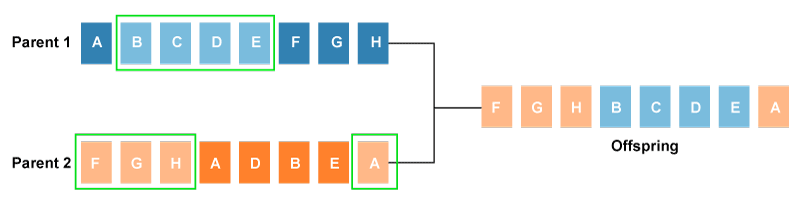
 The genes of parents are exchanged among themselves until the crossover point is met. These newly generated offspring are added to the population. This process is also called or crossover. Types of crossover styles available:
<ul>
<li>One point crossover</li>
<li>Two-point crossover</li>
<li>Livery crossover</li>
<li>Inheritable Algorithms crossover</li>
    </ul></li>
    
<li><b>Mutation :</b>The mutation operator inserts random genes in the offspring (new child) to maintain the diversity in the population. It can be done by flipping some bits in the chromosomes.
Mutation helps in solving the issue of premature convergence and enhances diversification. The below image shows the mutation process:

Types of mutation styles available,
 <ul>
<li>Flip bit mutation</li>
<li>Gaussian mutation</li>
<li>Exchange/Swap mutation</li>
</ul>

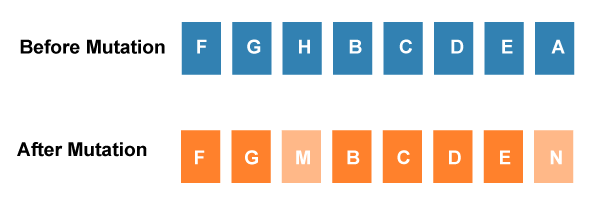

</li>
    
    
</ul>

### 5. Termination

After the reproduction phase, a stopping criterion is applied as a base for termination. The algorithm terminates after the threshold fitness solution is reached. It will identify the final solution as the best solution in the population.

### Sample Code

In [1]:
# Python3 program to create target string, starting from 
# random string using Genetic Algorithm 

import random 

# Number of individuals in each generation 
POPULATION_SIZE = 100

# Valid genes 
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP 
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated 
TARGET = "I study at FAST"

class Individual(object): 
	''' 
	Class representing individual in population 
	'''
	def __init__(self, chromosome): 
		self.chromosome = chromosome 
		self.fitness = self.cal_fitness() 

	@classmethod
	def mutated_genes(self): 
		''' 
		create random genes for mutation 
		'''
		global GENES 
		gene = random.choice(GENES) 
		return gene 

	@classmethod
	def create_gnome(self): 
		''' 
		create chromosome or string of genes 
		'''
		global TARGET 
		gnome_len = len(TARGET) 
		return [self.mutated_genes() for _ in range(gnome_len)] 

	def mate(self, par2): 
		''' 
		Perform mating and produce new offspring 
		'''

		# chromosome for offspring 
		child_chromosome = [] 
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):	 

			# random probability 
			prob = random.random() 

			# if prob is less than 0.45, insert gene 
			# from parent 1 
			if prob < 0.45: 
				child_chromosome.append(gp1) 

			# if prob is between 0.45 and 0.90, insert 
			# gene from parent 2 
			elif prob < 0.90: 
				child_chromosome.append(gp2) 

			# otherwise insert random gene(mutate), 
			# for maintaining diversity 
			else: 
				child_chromosome.append(self.mutated_genes()) 

		# create new Individual(offspring) using 
		# generated chromosome for offspring 
		return Individual(child_chromosome) 

	def cal_fitness(self): 
		''' 
		Calculate fitness score, it is the number of 
		characters in string which differ from target 
		string. 
		'''
		global TARGET 
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET): 
			if gs != gt: fitness+= 1
		return fitness 

# Driver code 
def main(): 
	global POPULATION_SIZE 

	#current generation 
	generation = 1

	found = False
	population = [] 

	# create initial population 
	for _ in range(POPULATION_SIZE): 
				gnome = Individual.create_gnome() 
				population.append(Individual(gnome)) 

	while not found: 

		# sort the population in increasing order of fitness score 
		population = sorted(population, key = lambda x:x.fitness) 

		# if the individual having lowest fitness score ie. 
		# 0 then we know that we have reached to the target 
		# and break the loop 
		if population[0].fitness <= 0: 
			found = True
			break

		# Otherwise generate new offsprings for new generation 
		new_generation = [] 

		# Perform Elitism, that mean 10% of fittest population 
		# goes to the next generation 
		s = int((10*POPULATION_SIZE)/100) 
		new_generation.extend(population[:s]) 

		# From 50% of fittest population, Individuals 
		# will mate to produce offspring 
		s = int((90*POPULATION_SIZE)/100) 
		for _ in range(s): 
			parent1 = random.choice(population[:50]) 
			parent2 = random.choice(population[:50]) 
			child = parent1.mate(parent2) 
			new_generation.append(child) 

		population = new_generation 

		print("Generation: {}\tString: {}\tFitness: {}".\
              format(generation, "".join(population[0].chromosome), population[0].fitness)) 

		generation += 1

	
	print("Generation: {}\tString: {}\tFitness: {}".\
          format(generation, "".join(population[0].chromosome), population[0].fitness))

if __name__ == '__main__': 
	main() 


Generation: 1	String: y$QVuw%%zo (o$1	Fitness: 13
Generation: 2	String: I$n;udRwzo Ult1	Fitness: 11
Generation: 3	String: I$n;udRwzo Ult1	Fitness: 11
Generation: 4	String: I$n;udRwzo Ult1	Fitness: 11
Generation: 5	String: I"pt6d:wat fnmy	Fitness: 9
Generation: 6	String: I"pt6d:wat fnmy	Fitness: 9
Generation: 7	String: HUstYd! ]6 iAS
	Fitness: 8
Generation: 8	String: I" tYdQ at BAm"	Fitness: 7
Generation: 9	String: T0studR at fAS7	Fitness: 5
Generation: 10	String: T0studR at fAS7	Fitness: 5
Generation: 11	String: T0studR at fAS7	Fitness: 5
Generation: 12	String: T0studR at fAS7	Fitness: 5
Generation: 13	String: T0studR at fAS7	Fitness: 5
Generation: 14	String: I rtudM at zAS7	Fitness: 4
Generation: 15	String: I[study /t FASd	Fitness: 3
Generation: 16	String: I[study /t FASd	Fitness: 3
Generation: 17	String: I[study /t FASd	Fitness: 3
Generation: 18	String: I study at &AS 	Fitness: 2
Generation: 19	String: I study at &AS 	Fitness: 2
Generation: 20	String: I study at &AS 	Fitness: 2
Gener

# Lab Task - The KnapSack Problem
The knapsack problem is a classic optimization problem that asks how to
maximize the total value of a set of items that can be placed in a knapsack with a
given weight capacity. In the standard version of the problem, each item has a
weight and a value, and the goal is to select a subset of the items that maximize the
total value while staying within the weight capacity of the knapsack.

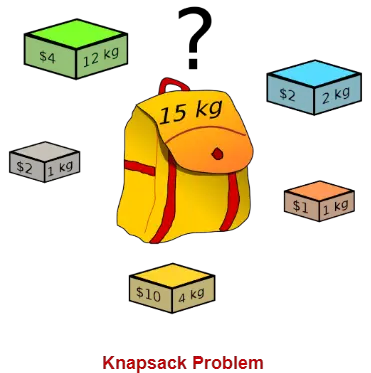
You are given the following-
<ul>
<li>A knapsack (kind of shoulder bag) with limited weight capacity.</li>
<li>Few items each having some weight and value.</li>
 </ul>
 
 Which items should be placed into the knapsack such that-
<ol>
<li>The value or profit obtained by putting the items into the knapsack is maximum.</li>
<li >And the weight limit of the knapsack does not exceed.</li>
</ol>


Your task is to select a subset of the items that maximize the total value while
staying within the physical volume capacity of the knapsack. The total weight and
size of the selected items must be less than or equal to the weight allowed.

You have to make the following functions:
    
<b> 1. Initialization:</b> Generate an initial population of pop_size individuals, where
each individual is a binary string of length n that represents whether each
item is included or not (1 = included, 0 = not included).

<b>2. Fitness Function:</b> Evaluate the fitness of each individual by calculating the
total value of the selected items and penalizing solutions that exceed the
physical volume capacity of the knapsack. The fitness function should return
a value that reflects the quality of the solution.

<b>3. Selection:</b> Select two individuals from the population with probability
proportional to their fitness. You can use any selection method you like,
such as roulette wheel selection, tournament selection, or rank-based
selection.

<b>4. Crossover: </b> Generate two offspring by applying crossover to the selected
parents. You can use any crossover method you like, such as one-point
crossover, two-point crossover, or uniform crossover.

<b>5. Mutation:</b> Mutate the offspring by flipping each bit in the binary string with
probability mut_prob.

</b>6. Replacement:</b> Replace the least-fit individuals in the population with the
offspring.

<b>7. Termination:</b> Repeat steps 3-6 for max_gen generations, or until a
satisfactory solution is found.

In [2]:
import random

# Define the knapsack problem parameters
weights = [10, 20, 30, 40, 50]
values = [60, 100, 120, 160, 200]
max_weight = 100
population_size = 10
num_generations = 50
mutation_rate = 0.01

# Define the fitness function
def fitness(individual):
    total_weight = 0
    total_value = 0
    
    for i in range(len(individual)):
        if individual[i] == 1:
            total_weight += weights[i]
            total_value += values[i]
    
    if total_weight > max_weight:
        return 0  # invalid solution
    else:
        return total_value

# Define the selection function
def selection(population):
    fitness_values = [fitness(individual) for individual in population]
    total_fitness = sum(fitness_values)
    selection_probs = [fit / total_fitness for fit in fitness_values]
    selected_individual = random.choices(population, weights=selection_probs)[0]
    return selected_individual

# Define the crossover function
def crossover(parent1, parent2):
    crossover_point1 = random.randint(1, len(parent1) - 2)
    crossover_point2 = random.randint(crossover_point1 + 1, len(parent1) - 1)
    child1 = parent1[:crossover_point1] + parent2[crossover_point1:crossover_point2] + parent1[crossover_point2:]
    child2 = parent2[:crossover_point1] + parent1[crossover_point1:crossover_point2] + parent2[crossover_point2:]
    return child1, child2

# Define the mutation function
def mutation(individual):
    mutated_individual = []
    for gene in individual:
        if random.random() < mutation_rate:
            mutated_individual.append(1 - gene)  # flip the bit
        else:
            mutated_individual.append(gene)
    return mutated_individual

# Initialize the population
def initialize_population():
    population = [[random.randint(0, 1) for _ in range(len(weights))] for _ in range(population_size)]
    return population

# Run the genetic algorithm
def genetic_algorithm():
    population = initialize_population()
    
    for generation in range(num_generations):
        # Selection
        selected_population = [selection(population) for _ in range(population_size)]
        
        # Crossover
        offspring_population = []
        for i in range(0, population_size, 2):
            child1, child2 = crossover(selected_population[i], selected_population[i + 1])
            offspring_population.extend([child1, child2])
        
        # Mutation
        mutated_population = [mutation(individual) for individual in offspring_population]
        
        # Replace the old population with the new one
        population = mutated_population
    
    # Get the best individual from the final population
    best_individual = max(population, key=fitness)
    best_fitness = fitness(best_individual)
    
    return best_individual, best_fitness

# Run the genetic algorithm and print the result
best_solution, best_fitness = genetic_algorithm()
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)


Best solution: [0, 1, 1, 0, 1]
Best fitness: 420
